In [74]:
#pattern recognition of words to identify duplicate questions 
#author Pradeep Purushothaman

#imports

import os
import re

import pandas as pd
pd.options.mode.chained_assignment = None

import numpy as np

import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

#based on processing capacity
questions_to_process=10000

In [75]:
#read the question list csv file
#dataset
#https://www.kaggle.com/datasets/tunguz/200000-jeopardy-questions
#limiting only to 10,000 questions to avoid a single computer processing overload

questions=pd.read_csv("C:/JEOPARDY_CSV.csv",header='infer')

#list of columns of the data frame
questions.columns.tolist()

questions[' Question'].head(question_to_process)

0       For the last 8 years of his life, Galileo was ...
1       No. 2: 1912 Olympian; football star at Carlisl...
2       The city of Yuma in this state has a record av...
3       In 1963, live on "The Art Linkletter Show", th...
4       Signer of the Dec. of Indep., framer of the Co...
                              ...                        
9995    In the '90s home fires caused by these nearly ...
9996    "The Commodore" is one of the tales of this C....
9997    (Sofia of the Clue Crew standing in front of a...
9998    Tuna are members of Scombridae, known commonly...
9999    Bestsellers from this master of horror include...
Name:  Question, Length: 10000, dtype: object

In [76]:
#checking for exact duplicates of questions

duplicated_questions=questions[questions[' Question'].duplicated()]
duplicated_questions.head(duplicated_questions[' Question'].count())




,Show Number,Air Date,Round,Category,Value,Question,Answer
7141,5171,2007-02-19,Double Jeopardy!,NAME THE POET,$400,"""His pride had cast him out from heaven, with ...",Milton
7699,5467,2008-05-20,Double Jeopardy!,"""T"" TIME",$1600,"Poi, a luau treat, is made from these mashed r...",taro
13382,3788,2001-02-07,Jeopardy!,MAMMALS,$300,"Common in Dixie, a razorback is a wild one of ...",boar (hog)
13737,1191,1989-11-06,Jeopardy!,THE QUOTABLE FRANKLIN,$200,"These ""fell great oaks""",Little Srokes
15558,5468,2008-05-21,Double Jeopardy!,FUN WITH OPERA,$1200,"In Nicolai's opera ""The Merry Wives of Windsor...",Falstaff
...,...,...,...,...,...,...,...
216144,6207,2011-09-20,Double Jeopardy!,THIS IS A JOB FOR A HERO,$2000,George Smiley,the spy
216303,5236,2007-05-21,Double Jeopardy!,COUNTRIES' HIGHEST POINTS,$800,Mount Ararat,Turkey
216349,3919,2001-09-20,Jeopardy!,FAMILIAR EXPRESSIONS,$400,"Meaning ""in trouble"", the expression ""in"" this...",a pickle
216579,2046,1993-06-28,Jeopardy!,COMPLETES THE PROVERB,$200,"""Never look a gift horse...""",in the mouth


In [77]:
#drop exactly duplicated questions
#questions_duplicates_removed=questions.drop(duplicated_questions.index)

#duplicated_questions_check=questions_duplicates_removed[questions_duplicates_removed[' Question'].duplicated()]
#duplicated_questions_check.head(duplicated_questions_check[' Question'].count())



In [78]:
#creating a question with similar meaning but not an exact word match for a duplicated question 
#7686 Common in Dixie, a razorback is a wild one of these

df=questions[questions.index==7686]
df[" Question"]="Which wild animal does a razorback refer to?"
added_question=pd.concat([df,questions],ignore_index=True)
questions=added_question
questions.head(10)

,Show Number,Air Date,Round,Category,Value,Question,Answer
0,5467,2008-05-20,Double Jeopardy!,MAMMALS,$800,Which wild animal does a razorback refer to?,hog
1,4680,2004-12-31,Jeopardy!,HISTORY,$200,"For the last 8 years of his life, Galileo was ...",Copernicus
2,4680,2004-12-31,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,$200,No. 2: 1912 Olympian; football star at Carlisl...,Jim Thorpe
3,4680,2004-12-31,Jeopardy!,EVERYBODY TALKS ABOUT IT...,$200,The city of Yuma in this state has a record av...,Arizona
4,4680,2004-12-31,Jeopardy!,THE COMPANY LINE,$200,"In 1963, live on ""The Art Linkletter Show"", th...",McDonald's
5,4680,2004-12-31,Jeopardy!,EPITAPHS & TRIBUTES,$200,"Signer of the Dec. of Indep., framer of the Co...",John Adams
6,4680,2004-12-31,Jeopardy!,3-LETTER WORDS,$200,"In the title of an Aesop fable, this insect sh...",the ant
7,4680,2004-12-31,Jeopardy!,HISTORY,$400,Built in 312 B.C. to link Rome & the South of ...,the Appian Way
8,4680,2004-12-31,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,$400,"No. 8: 30 steals for the Birmingham Barons; 2,...",Michael Jordan
9,4680,2004-12-31,Jeopardy!,EVERYBODY TALKS ABOUT IT...,$400,"In the winter of 1971-72, a record 1,122 inche...",Washington


In [79]:
#remove punctuation from questions
punctuation=['.',',',':',';','?','!','-','"']

def remove_punctuation(punctuation):

    #list of punctuations to remove from the question  

    clean_data=""
    found_p=False
 
    #open the question for parsing
 
    for num in range(0,questions_to_process):
        clean_data=""
        question=(str)(questions[' Question'][num])   
    
        for  alphabet in question:
            for p in punctuation:
                if alphabet==p:
                    found_p=True
            if found_p!=True:
                clean_data=clean_data+alphabet
            found_p=False
        questions[' Question'][num]=clean_data
    
    print(questions[' Question'])
    
#call the function    
remove_punctuation(punctuation)  

0               Which wild animal does a razorback refer to
1         For the last 8 years of his life Galileo was u...
2         No 2 1912 Olympian football star at Carlisle I...
3         The city of Yuma in this state has a record av...
4         In 1963 live on The Art Linkletter Show this c...
                                ...                        
216926    This Puccini opera turns on the solution to 3 ...
216927    In North America this term is properly applied...
216928    In Penny Lane, where this "Hellraiser" grew up...
216929    From Ft. Sill, Okla. he made the plea, Arizona...
216930    A silent movie title includes the last name of...
Name:  Question, Length: 216931, dtype: object


In [80]:
#split the questions to individual words

for num in range(0,questions_to_process):
    split_question=(str)(questions[' Question'][num]).split(" ")
    questions[' Question'][num]=split_question

In [81]:
 questions[' Question'].head(questions_to_process)

0       [Which, wild, animal, does, a, razorback, refe...
1       [For, the, last, 8, years, of, his, life, Gali...
2       [No, 2, 1912, Olympian, football, star, at, Ca...
3       [The, city, of, Yuma, in, this, state, has, a,...
4       [In, 1963, live, on, The, Art, Linkletter, Sho...
                              ...                        
9995    [The, Stones, played, a, cleanedup, version, o...
9996    [In, the, '90s, home, fires, caused, by, these...
9997    [The, Commodore, is, one, of, the, tales, of, ...
9998    [(Sofia, of, the, Clue, Crew, standing, in, fr...
9999    [Tuna, are, members, of, Scombridae, known, co...
Name:  Question, Length: 10000, dtype: object

In [82]:
#calculate the probability of word match of a question with a selected reference question

#known duplicate reference question
index_ref=7687

#probability threshold to accept a word match
probability_threshold=0.3

def calculate_word_match(index_ref,probability_threshold):

    sentence_match_count=0
    ref_word_list=[]
    ref_compare_list=[]

    pattern_match_probability=[]
    filtered_pattern_match=dict({})

    print("\nreference question")
    print(questions[' Question'][index_ref])
    print("\n")

    ref_word_list=questions[' Question'][index_ref]
    #make the ref_word_list unique for normalization of probability
    ref_word_list=list(set(ref_word_list))


    for index_compare in range(0,questions_to_process):
        sentence_match_count=0
        for word in ref_word_list:
            ref_compare_list=questions[' Question'][index_compare]
            word_count=pd.Series(ref_compare_list.count(word))
            sentence_match_count=sentence_match_count+word_count.sum()
        

        pattern_match_probability=pattern_match_probability+[(sentence_match_count)/(len(ref_compare_list))]
   
    q_num=0
    for prob in pattern_match_probability:
        if prob>probability_threshold:
            filtered_pattern_match[q_num]=prob
            print("index "+str(q_num)+" probability of match "+str(filtered_pattern_match[q_num]))
            print(questions[' Question'][q_num])
            print("\n")
        q_num=q_num+1
    return filtered_pattern_match
        
#call the function
fil_pattern_match=calculate_word_match(index_ref,probability_threshold)
    
#print the total number of word matches
original_pattern_match=len(fil_pattern_match)            
print("Total matches with probability threshold of "+str(probability_threshold)+"="+str(original_pattern_match))      


reference question
['Common', 'in', 'Dixie', 'a', 'razorback', 'is', 'a', 'wild', 'one', 'of', 'these']


index 0 probability of match 0.375
['Which', 'wild', 'animal', 'does', 'a', 'razorback', 'refer', 'to']


index 74 probability of match 0.3333333333333333
['It', 'can', 'be', 'a', 'separating', 'line', 'in', 'your', 'hair', 'or', 'a', 'role', 'in', 'a', 'play']


index 87 probability of match 0.36363636363636365
['9995%', 'of', 'the', 'mass', 'of', 'an', 'atom', 'is', 'in', 'this', 'part']


index 190 probability of match 0.3076923076923077
['Andy', 'Garcia', 'is', 'a', 'native', 'of', 'this', 'country', 'whose', 'flag', 'is', 'seen', 'here']


index 243 probability of match 0.3333333333333333
['Tired', 'of', 'eating', 'mule', 'jerky', 'Vicksburg', 'fell', 'in', 'July', '1863', 'after', 'a', '6week', 'one', 'of', 'these', 'military', 'tactics']


index 313 probability of match 0.4
['A', 'crash', 'is', 'a', 'group', 'of', 'these', 'large', 'horned', 'mammals']


index 325 probabili

In [83]:
#calculate word distribution count for the questions 

word_dictionary=dict({})

def calculate_word_distribution():
    word_dict=dict({})

    for question in range(0,questions_to_process):
        question=(questions[' Question'][question])
        for q in question:
            if q in word_dict:
                word_dictionary[q]=word_dict[q]+1
            else:
                word_dict[q]=1

    print(word_dict)
    return word_dict
        
word_dictionary=calculate_word_distribution()   

    
    

{'Which': 1, 'wild': 1, 'animal': 1, 'does': 1, 'a': 1, 'razorback': 1, 'refer': 1, 'to': 1, 'For': 1, 'the': 1, 'last': 1, '8': 1, 'years': 1, 'of': 1, 'his': 1, 'life': 1, 'Galileo': 1, 'was': 1, 'under': 1, 'house': 1, 'arrest': 1, 'for': 1, 'espousing': 1, 'this': 1, "man's": 1, 'theory': 1, 'No': 1, '2': 1, '1912': 1, 'Olympian': 1, 'football': 1, 'star': 1, 'at': 1, 'Carlisle': 1, 'Indian': 1, 'School': 1, '6': 1, 'MLB': 1, 'seasons': 1, 'with': 1, 'Reds': 1, 'Giants': 1, '&': 1, 'Braves': 1, 'The': 1, 'city': 1, 'Yuma': 1, 'in': 1, 'state': 1, 'has': 1, 'record': 1, 'average': 1, '4055': 1, 'hours': 1, 'sunshine': 1, 'each': 1, 'year': 1, 'In': 1, '1963': 1, 'live': 1, 'on': 1, 'Art': 1, 'Linkletter': 1, 'Show': 1, 'company': 1, 'served': 1, 'its': 1, 'billionth': 1, 'burger': 1, 'Signer': 1, 'Dec': 1, 'Indep': 1, 'framer': 1, 'Constitution': 1, 'Mass': 1, 'second': 1, 'President': 1, 'United': 1, 'States': 1, 'title': 1, 'an': 1, 'Aesop': 1, 'fable': 1, 'insect': 1, 'shared': 1

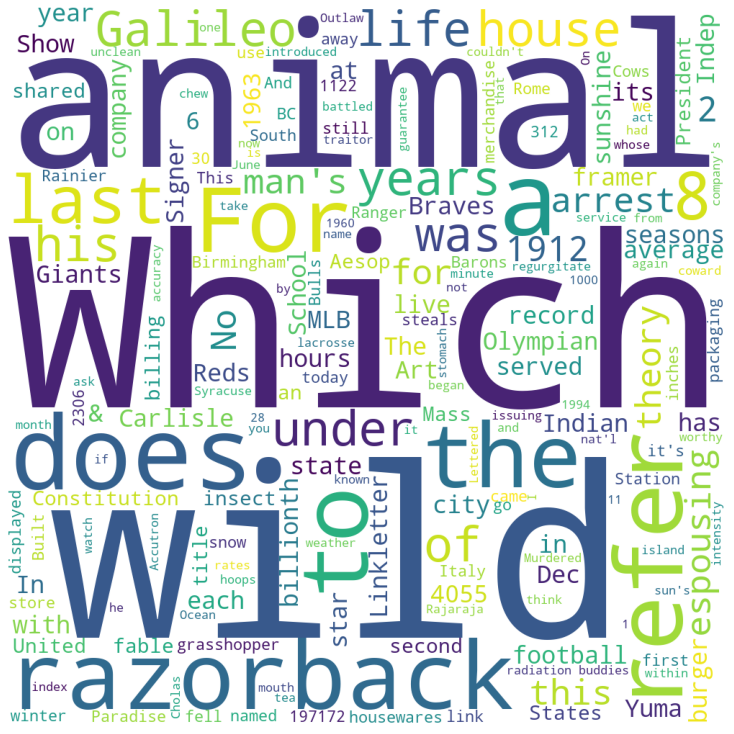

In [84]:
#plot the word cloud for the word distribution of questions
def plot_word_cloud():

    wordcloud = WordCloud(width = 1000, height = 1000,
                background_color ='white',
                min_font_size = 10).generate_from_frequencies(frequencies=word_dictionary)
    plt.figure(figsize = (10, 10), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0) 
    plt.show()
    
plot_word_cloud()

In [85]:
#removing the non key words identified from the word cloud to improve pattern recognition accuracy

words=['of','the','this','that','for','from','to','is','was','a','in','these','his','sits','on','&','with','by','as','Of','The','This','That','For','From','To','Is','Was','A','In','These','His','Sits','On','With','By','As']

def remove_words(words):

    for question in range(0,questions_to_process):
        quest=(questions[' Question'][question])
        for q in quest:
            if q in words:
                quest.remove(q)
        questions[' Question'][question]=quest
        print(questions[' Question'][question])

remove_words(words)       

['Which', 'wild', 'animal', 'does', 'razorback', 'refer']
['the', 'last', '8', 'years', 'his', 'life', 'Galileo', 'under', 'house', 'arrest', 'espousing', "man's", 'theory']
['No', '2', '1912', 'Olympian', 'football', 'star', 'at', 'Carlisle', 'Indian', 'School', '6', 'MLB', 'seasons', 'the', 'Reds', 'Giants', 'Braves']
['city', 'Yuma', 'this', 'state', 'has', 'record', 'average', '4055', 'hours', 'sunshine', 'each', 'year']
['1963', 'live', 'The', 'Art', 'Linkletter', 'Show', 'company', 'served', 'its', 'billionth', 'burger']
['Signer', 'the', 'Dec', 'Indep', 'framer', 'the', 'Constitution', 'Mass', 'second', 'President', 'the', 'United', 'States']
['the', 'title', 'an', 'Aesop', 'fable', 'insect', 'shared', 'billing', 'a', 'grasshopper']
['Built', '312', 'BC', 'link', 'Rome', 'the', 'South', 'Italy', "it's", 'still', 'use', 'today']
['No', '8', '30', 'steals', 'the', 'Birmingham', 'Barons', '2306', 'steals', 'the', 'Bulls']
['the', 'winter', '197172', 'record', '1122', 'inches', 'sno

In [86]:
#recalculating probability of word match after non key word removal

index_ref=7687
probability_threshold=0.3

fil_pattern_match=calculate_word_match(index_ref,probability_threshold)
    
print("Total matches after non keyword removal with probability threshold of "+str(probability_threshold)+"="+str(len(fil_pattern_match))) 
print("False positive percentage reduction with probability threshold of "+str(probability_threshold)+"="+str((original_pattern_match-len(fil_pattern_match))/len(fil_pattern_match)*100))            


reference question
['Common', 'Dixie', 'razorback', 'a', 'wild', 'one', 'these']


index 0 probability of match 0.3333333333333333
['Which', 'wild', 'animal', 'does', 'razorback', 'refer']


index 187 probability of match 0.3333333333333333
['blow', 'a', 'whip']


index 1218 probability of match 0.42857142857142855
['iris', 'a', 'flower', 'the', 'ibis', 'one', 'these']


index 2043 probability of match 0.3333333333333333
['Kentucky', 'burgoo', 'a', 'thick', 'one', 'these', 'made', 'meat', 'vegetables']


index 2243 probability of match 0.3333333333333333
['a', '1971', 'song', 'he', 'a', 'bullfrog']


index 3149 probability of match 0.4
['profession', 'Noah', 'Webster', 'one', 'these']


index 3202 probability of match 0.4
['Self', 'launched', '1979', 'one', 'these']


index 3781 probability of match 0.4
['16', 'tablespoons', 'equals', 'one', 'these']


index 4124 probability of match 0.3333333333333333
['winner', 'a', 'contest']


index 4763 probability of match 0.3333333333333333
['c

In [87]:
#calculate word distribution count for the questions after the removal of non key words

word_dictionary=calculate_word_distribution()

{'Which': 1, 'wild': 1, 'animal': 1, 'does': 1, 'razorback': 1, 'refer': 1, 'the': 1, 'last': 1, '8': 1, 'years': 1, 'his': 1, 'life': 1, 'Galileo': 1, 'under': 1, 'house': 1, 'arrest': 1, 'espousing': 1, "man's": 1, 'theory': 1, 'No': 1, '2': 1, '1912': 1, 'Olympian': 1, 'football': 1, 'star': 1, 'at': 1, 'Carlisle': 1, 'Indian': 1, 'School': 1, '6': 1, 'MLB': 1, 'seasons': 1, 'Reds': 1, 'Giants': 1, 'Braves': 1, 'city': 1, 'Yuma': 1, 'this': 1, 'state': 1, 'has': 1, 'record': 1, 'average': 1, '4055': 1, 'hours': 1, 'sunshine': 1, 'each': 1, 'year': 1, '1963': 1, 'live': 1, 'The': 1, 'Art': 1, 'Linkletter': 1, 'Show': 1, 'company': 1, 'served': 1, 'its': 1, 'billionth': 1, 'burger': 1, 'Signer': 1, 'Dec': 1, 'Indep': 1, 'framer': 1, 'Constitution': 1, 'Mass': 1, 'second': 1, 'President': 1, 'United': 1, 'States': 1, 'title': 1, 'an': 1, 'Aesop': 1, 'fable': 1, 'insect': 1, 'shared': 1, 'billing': 1, 'a': 1, 'grasshopper': 1, 'Built': 1, '312': 1, 'BC': 1, 'link': 1, 'Rome': 1, 'South'

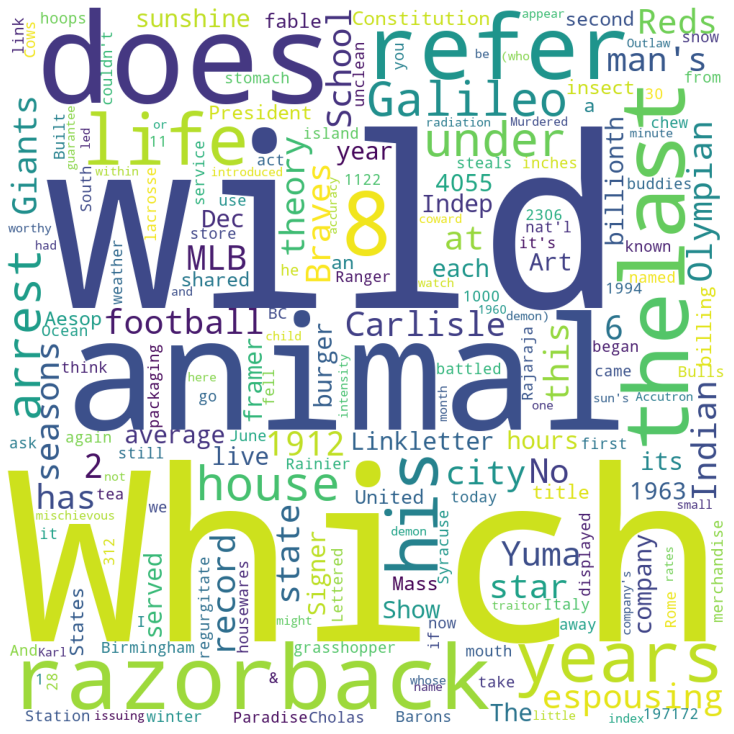

In [88]:
#plot the word cloud with only the key words retained from the questions

plot_word_cloud()